# 중앙선거관리위원회 자료 분석

In [1]:
from selenium import webdriver
import time

In [2]:
driver = webdriver.Chrome("chromedriver.exe")
driver.get("http://info.nec.go.kr/main/showDocument.xhtml?electionId=0000000000&topMenuId=VC&secondMenuId=VCCP09")

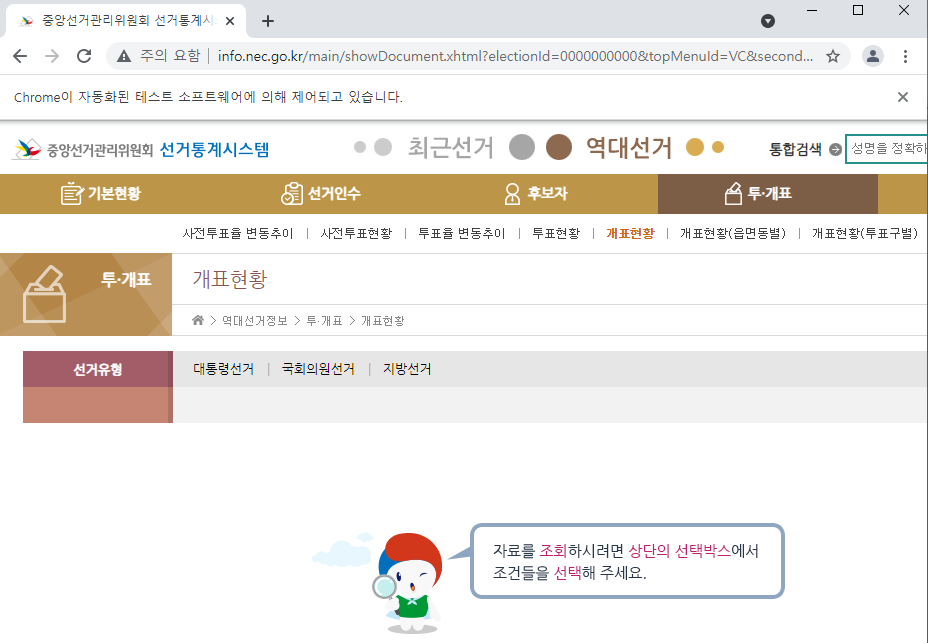

- 대통령선거 항목을 선택한다.

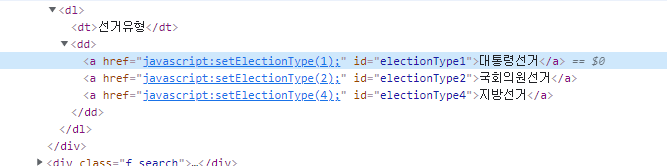

In [3]:
driver.find_element_by_id('electionType1').click()

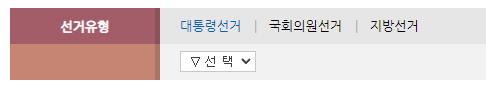

- 제 19대 선거항목을 선택한다

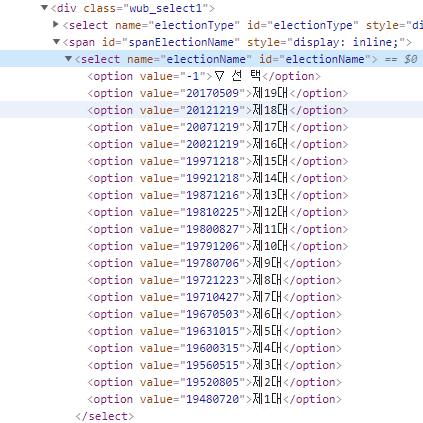

In [4]:
driver.find_element_by_id('electionName').send_keys('제 19대')

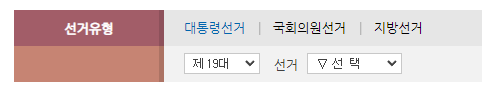

- 선거 항목에서 대통령선거를 다시 선택한다.

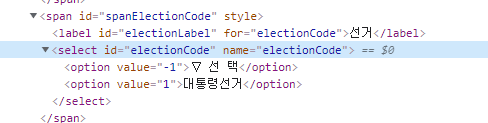

In [5]:
driver.find_element_by_id('electionCode').send_keys('대통령선거')

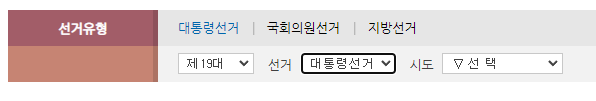

- 시도항목을 순서대로 선택하여 시도별 선거결과의 정보를 구한다.

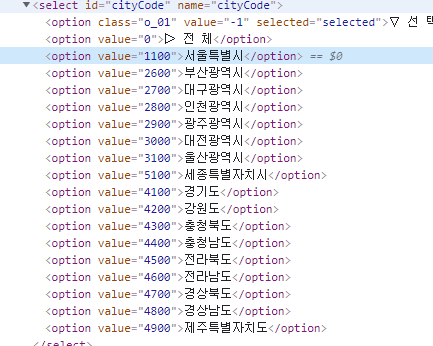

- 시도 항목의 xpath값을 찾고 해당 리스트를 가져온다.

In [6]:
sido_list_raw = driver.find_element_by_xpath('''//*[@id="cityCode"]''')

sido_list = sido_list_raw.find_elements_by_tag_name('option')

sido_names_values = [option.text for option in sido_list]

sido_names_values = sido_names_values[2:]

sido_names_values

['서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원도',
 '충청북도',
 '충청남도',
 '전라북도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [16]:
# 선거 투표수에 있는 천단위 기호를 제거해주는 함수 생성

import re

def get_num(tmp) :
    return float(re.split('\(', str(tmp))[0].replace(',', ''))

### 시도이름이 들어 있는 리스트를 반복문으로 실행하여 선거 결과를 수집한다.

In [17]:
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

wait = WebDriverWait(driver, 10)

# 시도를 검색하는 함수 생성
def move_sido(name) :
    element = driver.find_element_by_id('cityCode')
    element.send_keys(name)
    make_xpath = '''//*[@id="searchBtn"]'''
    wait.until(EC.element_to_be_clickable((By.XPATH, make_xpath)))
    driver.find_element_by_xpath(make_xpath).click()

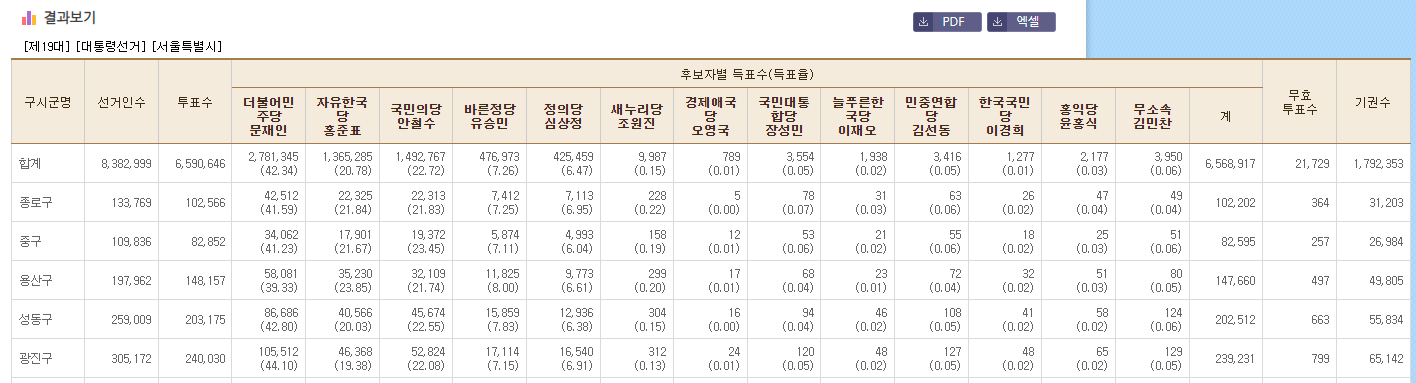

In [18]:
# 정보를 수집하는 함수 생성

def append_data(df, sido_name, data):
    for each in df[0].values[1:]:
        data['광역시도'].append(sido_name)
        data['시군'].append(each[0])
        data['pop'].append(get_num(each[2]))
        data['moon'].append(get_num(each[3]))
        data['hong'].append(get_num(each[4]))
        data['ahn'].append(get_num(each[5]))

In [19]:
# 수집된 정보를 저장할 초기화 변수 선언

election_result_raw = {
    '광역시도': [],
    '시군': [],
    'pop': [],
    'moon': [],
    'hong': [],
    'ahn': []
}

In [ ]:
!pip install lxml

In [20]:
from bs4 import BeautifulSoup
import pandas as pd

for each_sido in sido_names_values :
    move_sido(each_sido)
    
    html = driver.page_source
    soup = BeautifulSoup(html, 'lxml')
    
    table = soup.find('table')
    
    df = pd.read_html(str(table))
    append_data(df, each_sido, election_result_raw)

In [21]:
election_result = pd.DataFrame(election_result_raw, 
                columns = ['광역시도', '시군', 'pop', 'moon', 'hong', 'ahn'])

election_result

,광역시도,시군,pop,moon,hong,ahn
0,서울특별시,종로구,102566.0,42512.0,22325.0,22313.0
1,서울특별시,중구,82852.0,34062.0,17901.0,19372.0
2,서울특별시,용산구,148157.0,58081.0,35230.0,32109.0
3,서울특별시,성동구,203175.0,86686.0,40566.0,45674.0
4,서울특별시,광진구,240030.0,105512.0,46368.0,52824.0
...,...,...,...,...,...,...
245,경상남도,산청군,24513.0,6561.0,12544.0,2753.0
246,경상남도,거창군,41325.0,11256.0,19976.0,4923.0
247,경상남도,합천군,33021.0,7143.0,19699.0,3077.0
248,제주특별자치도,제주시,273163.0,125717.0,48027.0,55971.0


- 수집된 전국 시도_시군구별 투표 결과를 CSV 파일로 저장하기

In [22]:
election_result.to_csv('election_result.csv', encoding='utf-8', sep=',')

In [23]:
!dir election_result.csv

 F 드라이브의 볼륨: DO-LOVE
 볼륨 일련 번호: 9EC1-5CA3

 F:\00.DJA-PYTHON\02.재직자-데이터분석\4일차_1003 디렉터리

2021-10-03  오후 02:47            15,249 election_result.csv
               1개 파일              15,249 바이트
               0개 디렉터리  28,721,852,416 바이트 남음


In [24]:
driver.close()

In [25]:
election_result = pd.read_csv('election_result.csv', encoding='utf-8',
                             index_col = 0)
election_result.head()

,광역시도,시군,pop,moon,hong,ahn
0,서울특별시,종로구,102566.0,42512.0,22325.0,22313.0
1,서울특별시,중구,82852.0,34062.0,17901.0,19372.0
2,서울특별시,용산구,148157.0,58081.0,35230.0,32109.0
3,서울특별시,성동구,203175.0,86686.0,40566.0,45674.0
4,서울특별시,광진구,240030.0,105512.0,46368.0,52824.0
